In [71]:
import os
import xml.etree.ElementTree as ET
import pandas as pd

def process_xml_files(input_folder):
    # Initialize lists to store entity data
    entity_data = {'ID': [], 'ID entity': [], 'Offset': [], 'Text': [], 'Type': [], 'Full Sentence': []}

    # Initialize lists to store pair data
    pair_data = {'ID': [], 'ID pair': [], 'ID e1': [], 'ID e2': [],
                 'entity e1': [], 'entity e2': [], 'ddi': [], 'pair type': [], 'Full Sentence': []}

    # Iterate through each XML file in the input folder
    for filename in os.listdir(input_folder):
        if filename.endswith(".xml"):
            file_path = os.path.join(input_folder, filename)

            # Parse the XML file
            tree = ET.parse(file_path)
            root = tree.getroot()

            # Iterate through each sentence in the XML
            for sentence in root.findall('.//sentence'):
                sentence_id = sentence.attrib['id']
                sentence_text = sentence.attrib['text']

                # Iterate through each entity in the sentence
                for entity in sentence.findall('.//entity'):
                    entity_id = entity.attrib['id']
                    offset = entity.attrib['charOffset']
                    text = entity.attrib['text']
                    entity_type = entity.attrib['type']

                    # Append entity data to lists
                    entity_data['ID'].append(sentence_id)
                    entity_data['ID entity'].append(entity_id)
                    entity_data['Offset'].append(offset)
                    entity_data['Text'].append(text)
                    entity_data['Type'].append(entity_type)
                    entity_data['Full Sentence'].append(str(sentence_text).rstrip())

                # Iterate through each pair in the sentence
                for pair in sentence.findall('.//pair'):
                    pair_id = pair.attrib['id']
                    e1_id = pair.attrib['e1']
                    e2_id = pair.attrib['e2']
                    ddi = pair.attrib['ddi']

                    # Determine the type based on the 'ddi' attribute
                    pair_type = None if ddi == 'false' else pair.attrib.get('type', None)

                    # Find the corresponding entities
                    e1_entity = entity_data['Text'][entity_data['ID entity'].index(e1_id)]
                    e2_entity = entity_data['Text'][entity_data['ID entity'].index(e2_id)]

                    # Append pair data to lists
                    pair_data['ID'].append(sentence_id)
                    pair_data['ID pair'].append(pair_id)
                    pair_data['ID e1'].append(e1_id)
                    pair_data['ID e2'].append(e2_id)
                    pair_data['entity e1'].append(e1_entity)
                    pair_data['entity e2'].append(e2_entity)
                    pair_data['ddi'].append(ddi)
                    pair_data['pair type'].append(pair_type)
                    pair_data['Full Sentence'].append(str(sentence_text).rstrip())

    # Create DataFrames from the data
    entity_df = pd.DataFrame(entity_data)
    pair_df = pd.DataFrame(pair_data)

    return entity_df, pair_df

# Input folder path
input_folder_path = '/Users/benphan/NCKU/Courses/BioMedical_Information_Retrieval/Homework5/SemEval-2013-task-9/data/Train'

# Process XML files in the input folder
entity_df, pair_df = process_xml_files(input_folder_path)


In [72]:
entity_df

,ID,ID entity,Offset,Text,Type,Full Sentence
0,DDI-DrugBank.d10.s0,DDI-DrugBank.d10.s0.e0,21-29,Betaseron,brand,Interactions between Betaseron and other drugs...
1,DDI-DrugBank.d10.s1,DDI-DrugBank.d10.s1.e0,93-106,corticosteroid,group,Although studies designed to examine drug inte...
2,DDI-DrugBank.d10.s1,DDI-DrugBank.d10.s1.e1,111-114,ACTH,drug,Although studies designed to examine drug inte...
3,DDI-DrugBank.d10.s1,DDI-DrugBank.d10.s1.e2,219-227,Betaseron,brand,Although studies designed to examine drug inte...
4,DDI-DrugBank.d10.s2,DDI-DrugBank.d10.s2.e0,0-8,Betaseron,brand,Betaseron administration to three cancer patie...
...,...,...,...,...,...,...
12989,DDI-DrugBank.d567.s22,DDI-DrugBank.d567.s22.e2,163-171,glipizide,drug,Oral Hypoglycemic Agents: In pharmacokinetic s...
12990,DDI-DrugBank.d567.s22,DDI-DrugBank.d567.s22.e3,181-194,chlorpropamide,drug,Oral Hypoglycemic Agents: In pharmacokinetic s...
12991,DDI-DrugBank.d376.s0,DDI-DrugBank.d376.s0.e0,52-91,central nervous system (CNS) depressants,group,"May interact with addictive medications, espec..."
12992,DDI-DrugBank.d376.s0,DDI-DrugBank.d376.s0.e1,185-191,alcohol,drug,"May interact with addictive medications, espec..."


In [73]:
entity_df.describe()

,ID,ID entity,Offset,Text,Type,Full Sentence
count,12994,12994,12994,12994,12994,12994
unique,4879,12994,3979,2762,4,4763
top,DDI-DrugBank.d64.s87,DDI-DrugBank.d10.s0.e0,0-9,digoxin,drug,Drugs that reportedly may increase oral antico...
freq,55,1,281,188,8380,55


In [74]:
pair_df.head(20)

,ID,ID pair,ID e1,ID e2,entity e1,entity e2,ddi,pair type,Full Sentence
0,DDI-DrugBank.d10.s1,DDI-DrugBank.d10.s1.p0,DDI-DrugBank.d10.s1.e0,DDI-DrugBank.d10.s1.e1,corticosteroid,ACTH,false,None,Although studies designed to examine drug inte...
1,DDI-DrugBank.d10.s1,DDI-DrugBank.d10.s1.p1,DDI-DrugBank.d10.s1.e0,DDI-DrugBank.d10.s1.e2,corticosteroid,Betaseron,false,None,Although studies designed to examine drug inte...
2,DDI-DrugBank.d10.s1,DDI-DrugBank.d10.s1.p2,DDI-DrugBank.d10.s1.e1,DDI-DrugBank.d10.s1.e2,ACTH,Betaseron,false,None,Although studies designed to examine drug inte...
3,DDI-DrugBank.d10.s2,DDI-DrugBank.d10.s2.p0,DDI-DrugBank.d10.s2.e0,DDI-DrugBank.d10.s2.e1,Betaseron,antipyrine,true,mechanism,Betaseron administration to three cancer patie...
4,DDI-DrugBank.d10.s2,DDI-DrugBank.d10.s2.p1,DDI-DrugBank.d10.s2.e0,DDI-DrugBank.d10.s2.e2,Betaseron,Betaseron,false,None,Betaseron administration to three cancer patie...
5,DDI-DrugBank.d10.s2,DDI-DrugBank.d10.s2.p2,DDI-DrugBank.d10.s2.e1,DDI-DrugBank.d10.s2.e2,antipyrine,Betaseron,false,None,Betaseron administration to three cancer patie...
6,DDI-MedLine.d69.s0,DDI-MedLine.d69.s0.p0,DDI-MedLine.d69.s0.e0,DDI-MedLine.d69.s0.e1,contortrostatin,echistatin,false,None,Differential regulation of tyrosine phosphoryl...
7,DDI-MedLine.d69.s0,DDI-MedLine.d69.s0.p1,DDI-MedLine.d69.s0.e0,DDI-MedLine.d69.s0.e2,contortrostatin,flavoridin,false,None,Differential regulation of tyrosine phosphoryl...
8,DDI-MedLine.d69.s0,DDI-MedLine.d69.s0.p2,DDI-MedLine.d69.s0.e1,DDI-MedLine.d69.s0.e2,echistatin,flavoridin,false,None,Differential regulation of tyrosine phosphoryl...
9,DDI-MedLine.d69.s1,DDI-MedLine.d69.s1.p0,DDI-MedLine.d69.s1.e0,DDI-MedLine.d69.s1.e1,contortrostatin,echistatin,false,None,The homodimeric disintegrin contortrostatin wa...


In [75]:
pair_df.describe()

,ID,ID pair,ID e1,ID e2,entity e1,entity e2,ddi,pair type,Full Sentence
count,25089,25089,25089,25089,25089,25089,25089,3536,25089
unique,3329,25089,8115,8115,2242,2010,2,4,3287
top,DDI-DrugBank.d64.s87,DDI-DrugBank.d10.s1.p0,DDI-DrugBank.d64.s87.e0,DDI-DrugBank.d64.s87.e54,phenytoin,phenytoin,false,effect,Drugs that reportedly may increase oral antico...
freq,1485,1,54,54,299,365,21552,1525,1485


In [76]:
pair_df["pair type"].value_counts()

effect       1525
mechanism    1118
advise        707
int           186
Name: pair type, dtype: int64

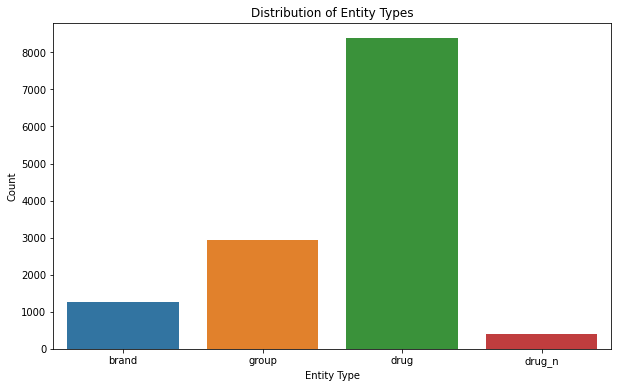

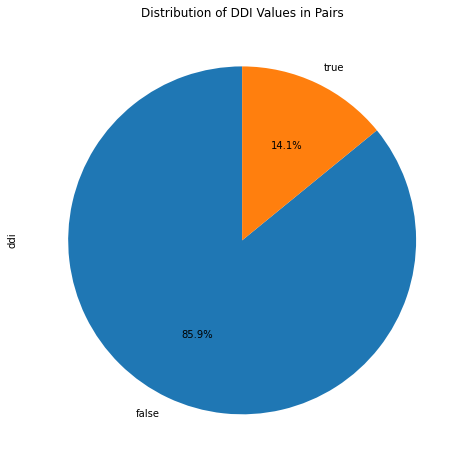

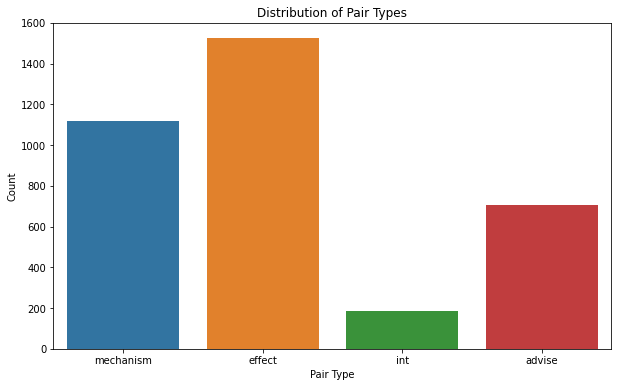

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you already have entity_df_result and pair_df_result DataFrames

# Plot a bar chart for the distribution of entity types in entity_df_result
plt.figure(figsize=(10, 6))
sns.countplot(x='Type', data=entity_df)
plt.title('Distribution of Entity Types')
plt.xlabel('Entity Type')
plt.ylabel('Count')
plt.show()

# Plot a pie chart for the distribution of ddi values in pair_df_result
plt.figure(figsize=(8, 8))
pair_df['ddi'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribution of DDI Values in Pairs')
plt.show()

# Plot a bar chart for the distribution of pair types in pair_df_result
plt.figure(figsize=(10, 6))
sns.countplot(x='pair type', data=pair_df)
plt.title('Distribution of Pair Types')
plt.xlabel('Pair Type')
plt.ylabel('Count')
plt.show()


In [78]:
dataset_frame = pair_df.loc[:, ['entity e1', 'entity e2', 'ddi', 'pair type']]
dataset_frame

,entity e1,entity e2,ddi,pair type
0,corticosteroid,ACTH,false,None
1,corticosteroid,Betaseron,false,None
2,ACTH,Betaseron,false,None
3,Betaseron,antipyrine,true,mechanism
4,Betaseron,Betaseron,false,None
...,...,...,...,...
25084,MEVACOR,chlorpropamide,false,None
25085,glipizide,chlorpropamide,false,None
25086,central nervous system (CNS) depressants,alcohol,false,None
25087,central nervous system (CNS) depressants,ethinamate,false,None


In [79]:
dataset_frame_no_duplicates = dataset_frame.drop_duplicates() 
dataset_frame_no_duplicates

,entity e1,entity e2,ddi,pair type
0,corticosteroid,ACTH,false,None
1,corticosteroid,Betaseron,false,None
2,ACTH,Betaseron,false,None
3,Betaseron,antipyrine,true,mechanism
4,Betaseron,Betaseron,false,None
...,...,...,...,...
25084,MEVACOR,chlorpropamide,false,None
25085,glipizide,chlorpropamide,false,None
25086,central nervous system (CNS) depressants,alcohol,false,None
25087,central nervous system (CNS) depressants,ethinamate,false,None


In [80]:
dataset_frame_no_duplicates.to_csv("save_results/dataset_frame_no_duplicates.csv", index=False,line_terminator='\n')
pair_df.to_csv("save_results/full_dataset.csv", index=False,line_terminator='\n') 